In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.7 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python


=== Median Filter ===
PSNR: 27.5668, SSIM: 0.5512, MSE: 0.001751

=== Wavelet Denoising ===
PSNR: 29.0743, SSIM: 0.7125, MSE: 0.001238


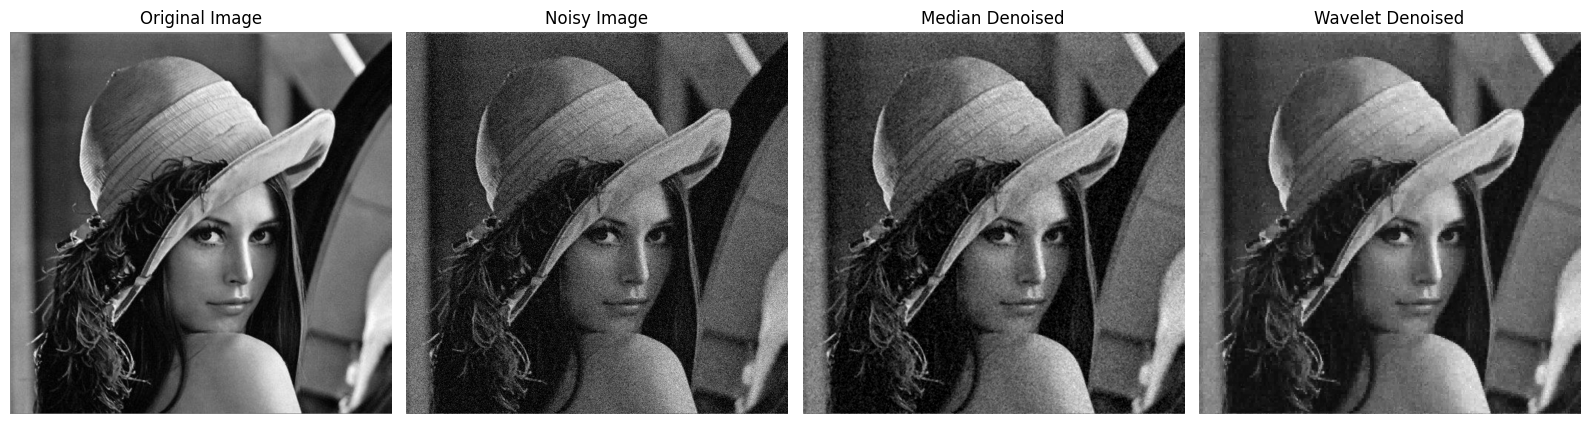

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, restoration, metrics, color
import cv2

# Load and convert sample image to grayscale
img= cv2.imread('Lena_Image.png')
clean_img = color.rgb2gray(img)

# Add Gaussian noise
noisy_img = util.random_noise(clean_img, mode='gaussian', var=0.01)

# Apply Median Filter
median_denoised = cv2.medianBlur((noisy_img * 255).astype(np.uint8), 3) / 255.0

# Apply Wavelet Denoising
wavelet_denoised = restoration.denoise_wavelet(noisy_img, channel_axis=None, rescale_sigma=True)

# Metrics for Median Filter
psnr_median = metrics.peak_signal_noise_ratio(clean_img, median_denoised)
ssim_median = metrics.structural_similarity(clean_img, median_denoised, data_range=1.0)
mse_median = metrics.mean_squared_error(clean_img, median_denoised)

# Metrics for Wavelet Denoising
psnr_wavelet = metrics.peak_signal_noise_ratio(clean_img, wavelet_denoised)
ssim_wavelet = metrics.structural_similarity(clean_img, wavelet_denoised, data_range=1.0)
mse_wavelet = metrics.mean_squared_error(clean_img, wavelet_denoised)

# Print results
print("=== Median Filter ===")
print(f"PSNR: {psnr_median:.4f}, SSIM: {ssim_median:.4f}, MSE: {mse_median:.6f}")

print("\n=== Wavelet Denoising ===")
print(f"PSNR: {psnr_wavelet:.4f}, SSIM: {ssim_wavelet:.4f}, MSE: {mse_wavelet:.6f}")

# Plot all images
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(clean_img, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(noisy_img, cmap='gray')
axes[1].set_title("Noisy Image")
axes[2].imshow(median_denoised, cmap='gray')
axes[2].set_title("Median Denoised")
axes[3].imshow(wavelet_denoised, cmap='gray')
axes[3].set_title("Wavelet Denoised")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

Total frames extracted: 2209


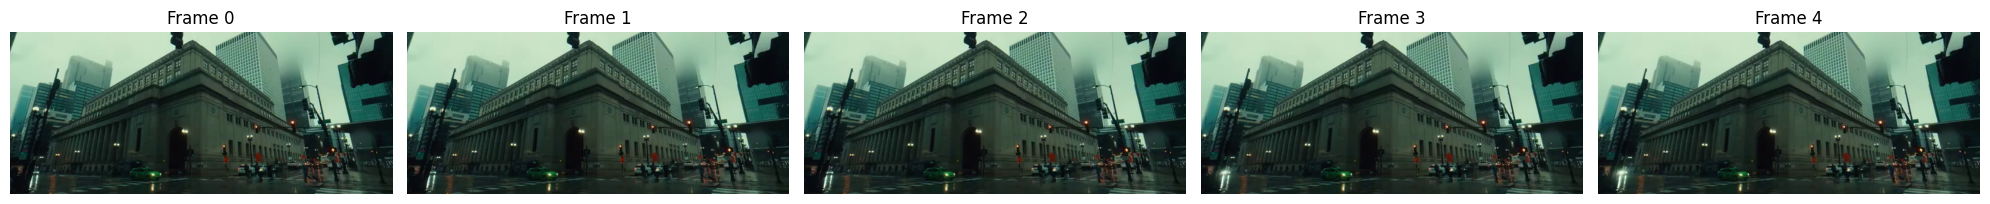

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

video_path = 'training video.mp4'
output_dir = 'extracted_frames'
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_count = 0
frames_to_show = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_filename = os.path.join(output_dir, f'frame_{frame_count:04d}.jpg')
    cv2.imwrite(frame_filename, frame)

    if frame_count < 5:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames_to_show.append(frame_rgb)

    frame_count += 1

cap.release()
print(f"Total frames extracted: {frame_count}")

# Display first 5 frames
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(frames_to_show[i])
    axes[i].set_title(f'Frame {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Total frames extracted (1 per second): 74


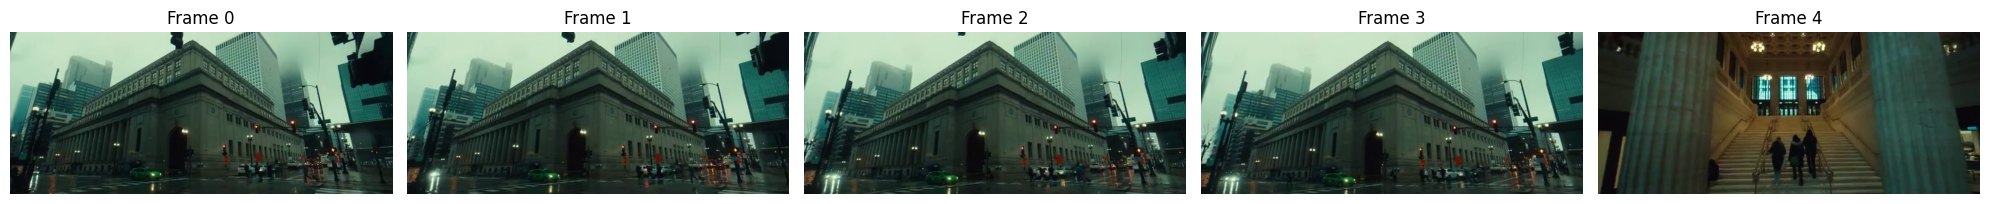

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

video_path = 'training video.mp4'
output_dir = 'extracted_1fps_frames'
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
frame_count = 0
saved_count = 0
frames_to_show = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % fps == 0:  # Capture one frame per second
        frame_filename = os.path.join(output_dir, f'frame_{saved_count:04d}.jpg')
        cv2.imwrite(frame_filename, frame)

        if saved_count < 5:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames_to_show.append(frame_rgb)

        saved_count += 1

    frame_count += 1

cap.release()
print(f"Total frames extracted (1 per second): {saved_count}")

# Display first 5 frames
fig, axes = plt.subplots(1, min(5, saved_count), figsize=(20, 5))
for i in range(len(frames_to_show)):
    axes[i].imshow(frames_to_show[i])
    axes[i].set_title(f'Frame {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import os
from glob import glob

input_dir = 'extracted_1fps_frames'
output_base = 'processed_frames'

ops = ['adaptive_thresh', 'gaussian_blur', 'canny_edges', 'bitwise_not']
for op in ops:
    os.makedirs(os.path.join(output_base, op), exist_ok=True)

frame_paths = sorted(glob(os.path.join(input_dir, '*.jpg')))

for i, path in enumerate(frame_paths):
    frame = cv2.imread(path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 1. Adaptive Thresholding
    adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

    # 2. Gaussian Blur
    gaussian = cv2.GaussianBlur(gray, (5, 5), 0)

    # 3. Canny Edge Detection
    canny = cv2.Canny(gray, 100, 200)

    # 4. Bitwise NOT
    bitwise = cv2.bitwise_not(gray)

    # Save processed images
    cv2.imwrite(f'{output_base}/adaptive_thresh/frame_{i:04d}.jpg', adaptive)
    cv2.imwrite(f'{output_base}/gaussian_blur/frame_{i:04d}.jpg', gaussian)
    cv2.imwrite(f'{output_base}/canny_edges/frame_{i:04d}.jpg', canny)
    cv2.imwrite(f'{output_base}/bitwise_not/frame_{i:04d}.jpg', bitwise)

print("All transformations applied and saved.")

All transformations applied and saved.


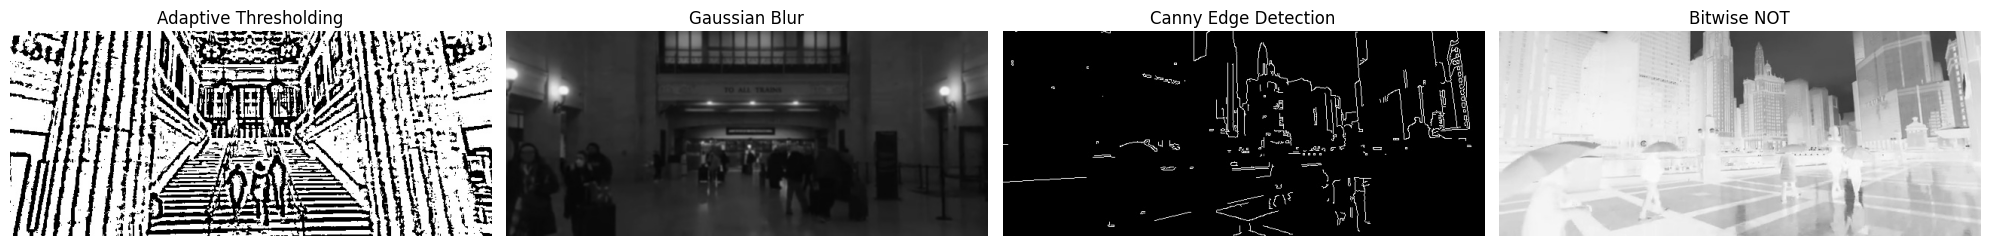

In [ ]:
import cv2
import random
import matplotlib.pyplot as plt

# Choose a random frame path from each processing folder
frame_paths_adaptive = sorted(glob('processed_frames/adaptive_thresh/*.jpg'))
frame_paths_gaussian = sorted(glob('processed_frames/gaussian_blur/*.jpg'))
frame_paths_canny = sorted(glob('processed_frames/canny_edges/*.jpg'))
frame_paths_bitwise = sorted(glob('processed_frames/bitwise_not/*.jpg'))

# Randomly select one frame from each transformation folder
frame_adaptive = cv2.imread(random.choice(frame_paths_adaptive))
frame_gaussian = cv2.imread(random.choice(frame_paths_gaussian))
frame_canny = cv2.imread(random.choice(frame_paths_canny))
frame_bitwise = cv2.imread(random.choice(frame_paths_bitwise))

# Convert to RGB for matplotlib
frame_adaptive_rgb = cv2.cvtColor(frame_adaptive, cv2.COLOR_BGR2RGB)
frame_gaussian_rgb = cv2.cvtColor(frame_gaussian, cv2.COLOR_BGR2RGB)
frame_canny_rgb = cv2.cvtColor(frame_canny, cv2.COLOR_BGR2RGB)
frame_bitwise_rgb = cv2.cvtColor(frame_bitwise, cv2.COLOR_BGR2RGB)

# Plot the processed images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(frame_adaptive_rgb)
axes[0].set_title("Adaptive Thresholding")
axes[0].axis('off')

axes[1].imshow(frame_gaussian_rgb)
axes[1].set_title("Gaussian Blur")
axes[1].axis('off')

axes[2].imshow(frame_canny_rgb)
axes[2].set_title("Canny Edge Detection")
axes[2].axis('off')

axes[3].imshow(frame_bitwise_rgb)
axes[3].set_title("Bitwise NOT")
axes[3].axis('off')

plt.tight_layout()
plt.show()

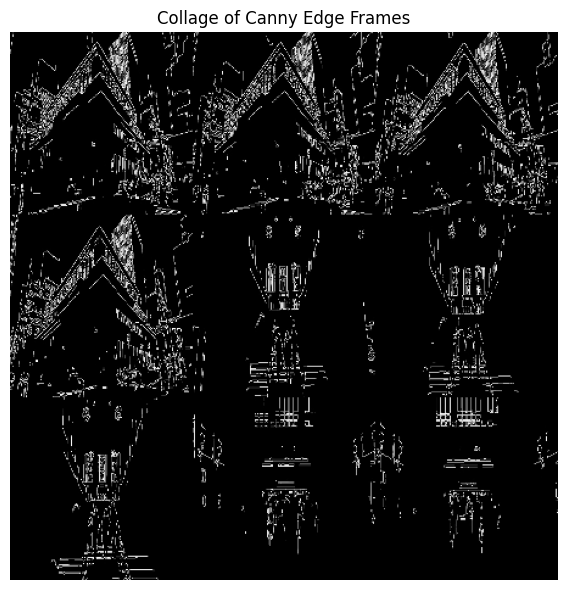

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

# Choose a folder from processed frames
frame_folder = 'processed_frames/canny_edges'
frame_paths = sorted(glob(os.path.join(frame_folder, '*.jpg')))[:9]  # take first 9 frames

collage_rows = 3
collage_cols = 3

# Load and resize each image to the same size (optional: 150x150)
frames = [cv2.resize(cv2.imread(path), (150, 150)) for path in frame_paths]

# Stack images row by row
rows = [np.hstack(frames[i*collage_cols:(i+1)*collage_cols]) for i in range(collage_rows)]
collage = np.vstack(rows)

# Display the collage
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(collage, cv2.COLOR_BGR2RGB))
plt.title('Collage of Canny Edge Frames')
plt.axis('off')
plt.tight_layout()
plt.show()

# Save collage
cv2.imwrite('/content/canny_edge_collage.jpg', collage)

In [ ]:
import cv2
import os

# Select processed frames folder (you can choose another type like 'gaussian_blur')
processed_folder = 'processed_frames/canny_edges'
output_video_path = 'canny_edge_video.avi'

# Video Writer setup (you can adjust the codec and FPS here)
frame_paths = sorted(glob(os.path.join(processed_folder, '*.jpg')))
frame = cv2.imread(frame_paths[0])

# Get frame dimensions (assuming all frames have same dimensions)
height, width, _ = frame.shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Video codec
video_writer = cv2.VideoWriter(output_video_path, fourcc, 10, (width, height))

# Write each frame into the video
for path in frame_paths:
    frame = cv2.imread(path)
    video_writer.write(frame)

# Release the video writer
video_writer.release()
print(f"Video saved at: {output_video_path}")

Video saved at: canny_edge_video.avi


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

# Move kaggle.json to the correct directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# !pip install -q kaggle
# !kaggle datasets download -d "keunwoo/ucf101" -p /content/

import kagglehub

# Download latest version
path = kagglehub.dataset_download("pevogam/ucf101")

print("Path to dataset files:", path)

100%|██████████| 6.49G/6.49G [00:39<00:00, 175MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pevogam/ucf101/versions/1


In [ ]:
import os

# Check the folder structure under UCF101
dataset_path = '/kaggle/input/ucf101/UCF101'
for root, dirs, files in os.walk(dataset_path):
    print("📁", root)
    for d in dirs:
        print(" ┣━", d)
    for f in files[:5]:  # Show only first 5 files to avoid overload
        print(" ┗━", f)
    break  # Only show top-level content for now

In [ ]:
import os
import shutil
import random

SOURCE_DIR = '/kaggle/input/ucf101/UCF101/UCF-101'  # Updated path
DEST_DIR = '/kaggle/working/UCF101_subset'  # Output directory inside working dir
SELECTED_CLASSES = ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']
VIDEOS_PER_CLASS = 10

os.makedirs(DEST_DIR, exist_ok=True)

for cls in SELECTED_CLASSES:
    class_path = os.path.join(SOURCE_DIR, cls)

    # Check if class folder exists
    if not os.path.exists(class_path):
        print(f"Class folder {cls} does not exist, skipping.")
        continue

    dest_class_path = os.path.join(DEST_DIR, cls)
    os.makedirs(dest_class_path, exist_ok=True)
    selected = random.sample(os.listdir(class_path), VIDEOS_PER_CLASS)
    for video in selected:
        shutil.copy(os.path.join(class_path, video), dest_class_path)


Class folder Basketball does not exist, skipping.
Class folder Biking does not exist, skipping.
Class folder PlayingGuitar does not exist, skipping.
Class folder Typing does not exist, skipping.
Class folder JumpRope does not exist, skipping.


In [ ]:
import cv2
import numpy as np

def extract_frames(video_path, frame_skip=5, size=(112, 112), max_frames=16):
    cap = cv2.VideoCapture(video_path)
    frames = []
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_skip == 0:
            frame = cv2.resize(frame, size)
            frames.append(frame)
            if len(frames) == max_frames:
                break
        count += 1
    cap.release()
    return np.array(frames)

In [ ]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, GlobalAveragePooling2D

def build_cnn_lstm(input_shape, num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = Sequential([
        TimeDistributed(base_model, input_shape=(16, *input_shape)),
        TimeDistributed(GlobalAveragePooling2D()),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

def build_3dcnn(input_shape, num_classes):
    model = Sequential([
        Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape),
        MaxPooling3D(pool_size=(2, 2, 2)),
        Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
        MaxPooling3D(pool_size=(2, 2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, class_names):
    print(classification_report(y_true, y_pred, target_names=class_names))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
import os
import numpy as np

DATASET_DIR = '/kaggle/working/UCF101_subset'
frame_data = []
labels = []

class_names = sorted(os.listdir(DATASET_DIR))
label_map = {cls: idx for idx, cls in enumerate(class_names)}

for cls in class_names:
    class_path = os.path.join(DATASET_DIR, cls)
    for video_file in os.listdir(class_path):
        video_path = os.path.join(class_path, video_file)
        frames = extract_frames(video_path)  # Your function from before
        if frames.shape[0] == 16:  # Ensure only fixed-length clips are added
            frame_data.append(frames)
            labels.append(label_map[cls])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming frame_data and labels are already populated
# For illustration, let's check if the data is empty or not

# Check if frame_data and labels are non-empty
if len(frame_data) == 0 or len(labels) == 0:
    print("Error: frame_data or labels are empty!")
else:
    # Convert frame_data to numpy array
    X = np.array(frame_data)

    # Convert labels to categorical using one-hot encoding
    y = to_categorical(labels, num_classes=len(class_names))

    # Check the shapes of X and y
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

    # Now split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Check the shapes of the splits
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")


Error: frame_data or labels are empty!


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, GlobalAveragePooling2D

# Example class names (replace this with actual class names)
class_names = ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']

# Replace with actual frame data and labels (currently generating random data)
frame_data = np.random.randn(100, 16, 112, 112, 3)  # 100 videos, each with 16 frames (112x112x3)
labels = np.random.randint(0, len(class_names), 100)  # Random labels for 100 videos

# Convert labels to one-hot encoding
y = to_categorical(labels, num_classes=len(class_names))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(frame_data, y, test_size=0.2, random_state=42)

# Build the CNN-LSTM model
def build_cnn_lstm(input_shape, num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = Sequential([
        TimeDistributed(base_model, input_shape=(16, *input_shape)),
        TimeDistributed(GlobalAveragePooling2D()),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Build the model
model = build_cnn_lstm((112, 112, 3), len(class_names))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


<ipython-input-29-df22634ed215>:23: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.1793 - loss: 1.6664 - val_accuracy: 0.1875 - val_loss: 1.6367
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 581ms/step - accuracy: 0.3430 - loss: 1.5664 - val_accuracy: 0.1875 - val_loss: 1.6553
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 585ms/step - accuracy: 0.2671 - loss: 1.5359 - val_accuracy: 0.1875 - val_loss: 1.6361
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 555ms/step - accuracy: 0.3878 - loss: 1.4979 - val_accuracy: 0.1875 - val_loss: 1.6265
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 566ms/step - accuracy: 0.4091 - loss: 1.4729 - val_accuracy: 0.1875 - val_loss: 1.6205
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 562ms/step - accuracy: 0.2559 - loss: 1.4692 - val_accuracy: 0.1875 - val_loss: 1.6520
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 559ms/step - accuracy: 0.3042 - loss: 1.5285 - val_accuracy: 0.3125 - val_loss: 1.7040
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 566ms/step - accuracy: 0.4612 - loss: 1.3526 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
               precision    recall  f1-score   support

   Basketball       0.00      0.00      0.00         2
       Biking       0.00      0.00      0.00         4
PlayingGuitar       0.29      0.83      0.43         6
       Typing       0.00      0.00      0.00         5
     JumpRope       0.00      0.00      0.00         3

     accuracy                           0.25        20
    macro avg       0.06      0.17      0.09        20
 weighted avg       0.09      0.25      0.13        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


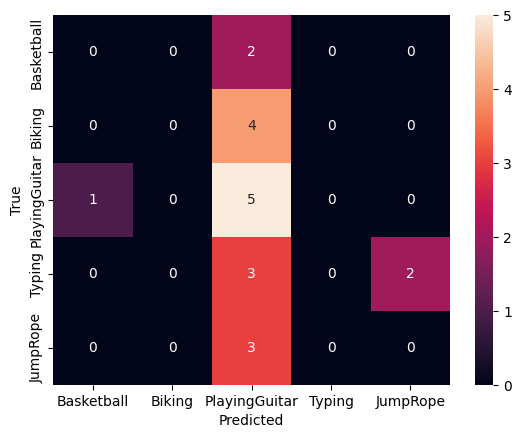

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

evaluate_model(y_true_classes, y_pred_classes, class_names)

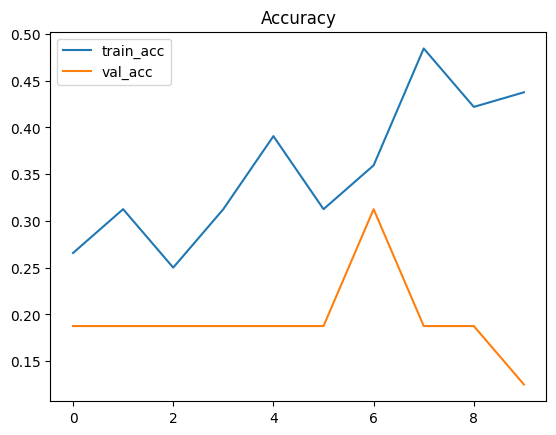

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.show()